**Librerías**

In [1]:
library(tseries)
library(TSA)

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'TSA' was built under R version 3.6.3"
Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



**Apertura de datos**

In [3]:
setwd("D:/Estadistica")
bc<-read.table("bitcoin.csv", sep=",", header = T )

**Nombrar por columna**

In [4]:
attach(bc) 

**Convertir a serie**

In [7]:
bc.ts=ts(bc, start =c(2018,3,17), end=c(2021,3,17),frequency=365)
bc_l<-bc.ts[,2]

**Análisis descriptivo**

[1] 2018    3

[1] 2021    3

ERROR while rich displaying an object: Error in if (many_rows) {: argumento tiene longitud cero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_

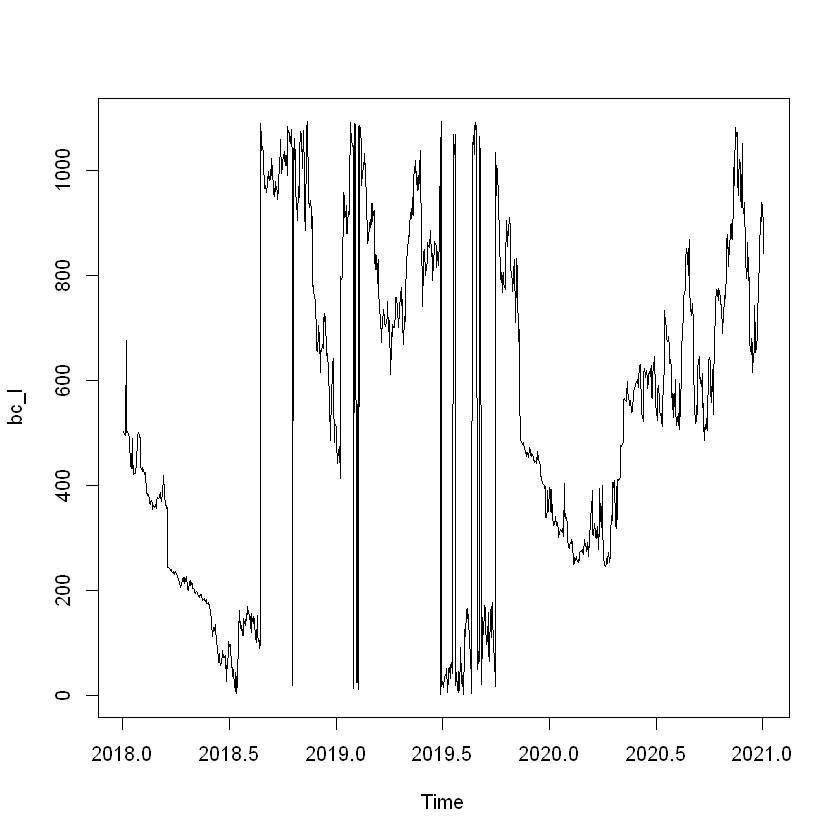

In [6]:
start(bc_l)
end(bc_l)
time(bc_l)
plot(bc_l)

## Clasificación

**Tendencia lineal**

**HO:** B1 igual a 0.

**Ha:** B1 diferente de 0.

alfa=0.05

In [10]:
tend<-lm(bc_l~time(bc_l), data=bc_l)

In [11]:
summary(tend)


Call:
lm(formula = bc_l ~ time(bc_l), data = bc_l)

Residuals:
   Min     1Q Median     3Q    Max 
-554.2 -268.2  -26.6  244.0  603.9 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -146491.63   21771.38  -6.729 2.76e-11 ***
time(bc_l)       72.81      10.78   6.754 2.33e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 309.4 on 1094 degrees of freedom
Multiple R-squared:  0.04003,	Adjusted R-squared:  0.03915 
F-statistic: 45.61 on 1 and 1094 DF,  p-value: 2.334e-11


*Modelo estimado*

* **p-valor:** 2.334e^-11,
* **R^2 ajustada:** 0.03915, por lo que no se ajusta al modelo lineal
* **MSE:** 
* **Conclusión:** Se rechazo Ho, dado que el p-valor muy pequeño y menor que alfa. Por lo que si hay relación entre las variables pero el modelo lineal no es el adecuado para describir los datos.

**Modelo de tendencia logarítmica**

**HO:** B1 igual a 0.

**Ha:** B1 diferente de 0.

alfa=0.05

In [12]:
x.<-log(time(bc_l))
tlog<-lm(bc_l~x.)
summary(tlog)


Call:
lm(formula = bc_l ~ x.)

Residuals:
   Min     1Q Median     3Q    Max 
-554.2 -268.2  -26.6  244.0  603.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1118601     165693  -6.751 2.38e-11 ***
x.            147051      21771   6.754 2.33e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 309.4 on 1094 degrees of freedom
Multiple R-squared:  0.04003,	Adjusted R-squared:  0.03915 
F-statistic: 45.62 on 1 and 1094 DF,  p-value: 2.326e-11


* **p-valor:** 2.326e^-11,
* **R^2 ajustada:** 0.04003, por lo que no se ajusta al modelo logarítico
* **MSE:** 
* **Conclusión:** Se rechazo Ho, dado que el p-valor muy pequeño y menor que alfa. Por lo que si hay relación entre las variables pero el modelo logarítmico no es el adecuado para describir los datos.

*Modelo estimado*

ERROR: Error: $ operator is invalid for atomic vectors


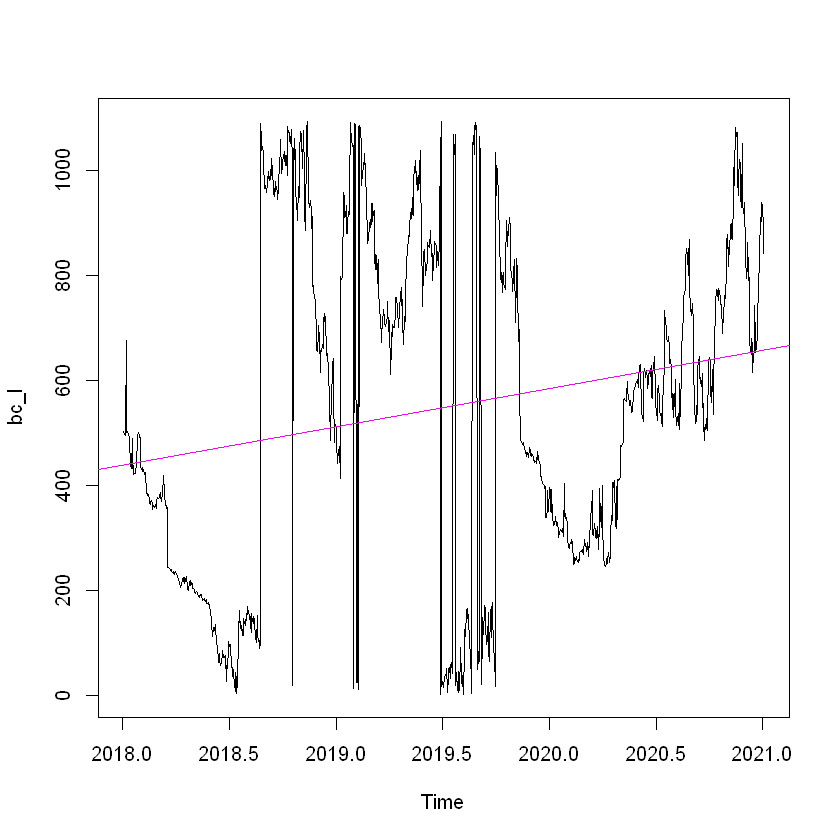

In [25]:
plot(bc_l)
tenl<-tlog$coefficients[1]+tlog$coefficients[2]*x.

abline(tend, col="magenta")
abline(tenl, col="blue")

**Modelo de tendencia polinómica**

**HO:** B1 igual a 0.

**Ha:** B1 diferente de 0.

alfa=0.05

In [23]:
tc<-as.numeric(time(bc_l))
tenc<-lm(bc_l~poly(tc, degree=10))
summary(tenc)


Call:
lm(formula = bc_l ~ poly(tc, degree = 10))

Residuals:
    Min      1Q  Median      3Q     Max 
-845.22 -105.56   10.26  119.72  593.33 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               547.683      6.996  78.282  < 2e-16 ***
poly(tc, degree = 10)1   2089.395    231.617   9.021  < 2e-16 ***
poly(tc, degree = 10)2   -873.985    231.617  -3.773  0.00017 ***
poly(tc, degree = 10)3   4276.114    231.617  18.462  < 2e-16 ***
poly(tc, degree = 10)4   2085.430    231.617   9.004  < 2e-16 ***
poly(tc, degree = 10)5  -4088.831    231.617 -17.653  < 2e-16 ***
poly(tc, degree = 10)6   1305.469    231.617   5.636 2.21e-08 ***
poly(tc, degree = 10)7    289.653    231.617   1.251  0.21136    
poly(tc, degree = 10)8  -1544.738    231.617  -6.669 4.08e-11 ***
poly(tc, degree = 10)9   1451.870    231.617   6.268 5.25e-10 ***
poly(tc, degree = 10)10  -314.478    231.617  -1.358  0.17483    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0

* **p-valor:** 2.2e^-16,
* **R^2 ajustada:** 0.4614, por lo que no se ajusta al modelo de tendencia polinómica
* **MSE:** 
* **Conclusión:** Se rechazo Ho, dado que el p-valor muy pequeño y menor que alfa. Por lo que si hay relación entre las variables por el modelo de tendencia polinómica y el modelo es adecuado.

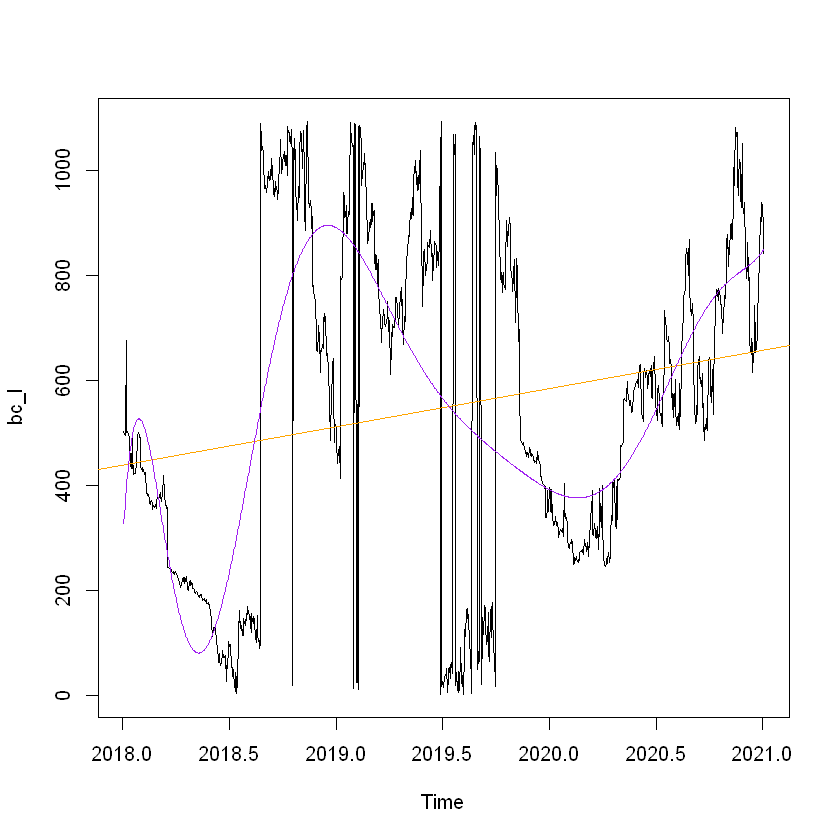

In [24]:
plot(bc_l)
abline(tend, col="orange")
lines(tc, fitted.values(tenc), col="purple")

Dado que el modelo muestra tendencia polinómica de grado 10, entonces NO muestra estacionariedad por media

**Varianza**

**HO:** La serie NO es estacionaria en varianza

**Ha:** La serie SI es estacionaria en varianza

alfa=0.05

In [28]:
adf.test(bc_l, alternative="stationary")


	Augmented Dickey-Fuller Test

data:  bc_l
Dickey-Fuller = -3.6549, Lag order = 10, p-value = 0.0274
alternative hypothesis: stationary


Dado que el p-valor es menor que alfa, se rechaza Ho, por lo que la serie es estacionaria en Varianza.

**Conclusión:** Dado que la serie NO muestra estacionariedad en media, pero si es varianza, se dice que la serie NO es estacionaria.

## Correcciones

**Corrección 1**

In [30]:
c1<-diff((bc_l))

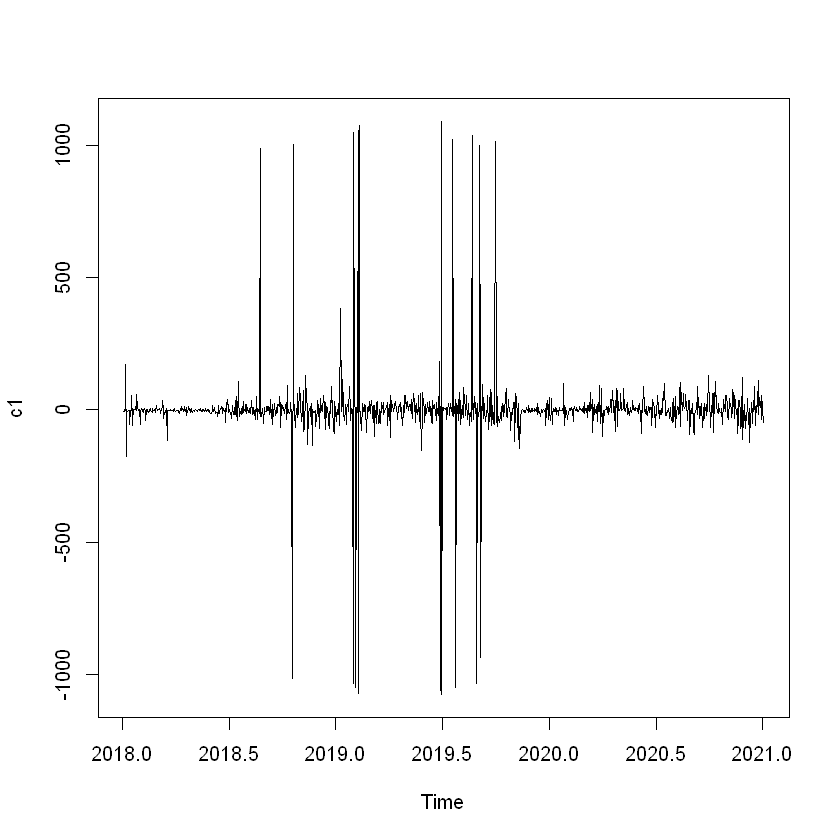

In [31]:
plot(c1)

**Tendencia**

In [32]:
tn<-lm(c1~time(c1))
summary(tn)


Call:
lm(formula = c1 ~ time(c1))

Residuals:
     Min       1Q   Median       3Q      Max 
-1077.30   -13.84    -1.64    11.71  1091.70 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -921.3284  9961.2456  -0.092    0.926
time(c1)       0.4564     4.9325   0.093    0.926

Residual standard error: 141.4 on 1093 degrees of freedom
Multiple R-squared:  7.832e-06,	Adjusted R-squared:  -0.0009071 
F-statistic: 0.00856 on 1 and 1093 DF,  p-value: 0.9263


No tiene tendencia lineal, entonces es estacionaria.

**Varianza**

In [33]:
adf.test(c1, alternative="stationary")

Warning message in adf.test(c1, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  c1
Dickey-Fuller = -12.973, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


La serie es estacionaria en varianza

Clasificación para C1: Estacionaria

## Modelado

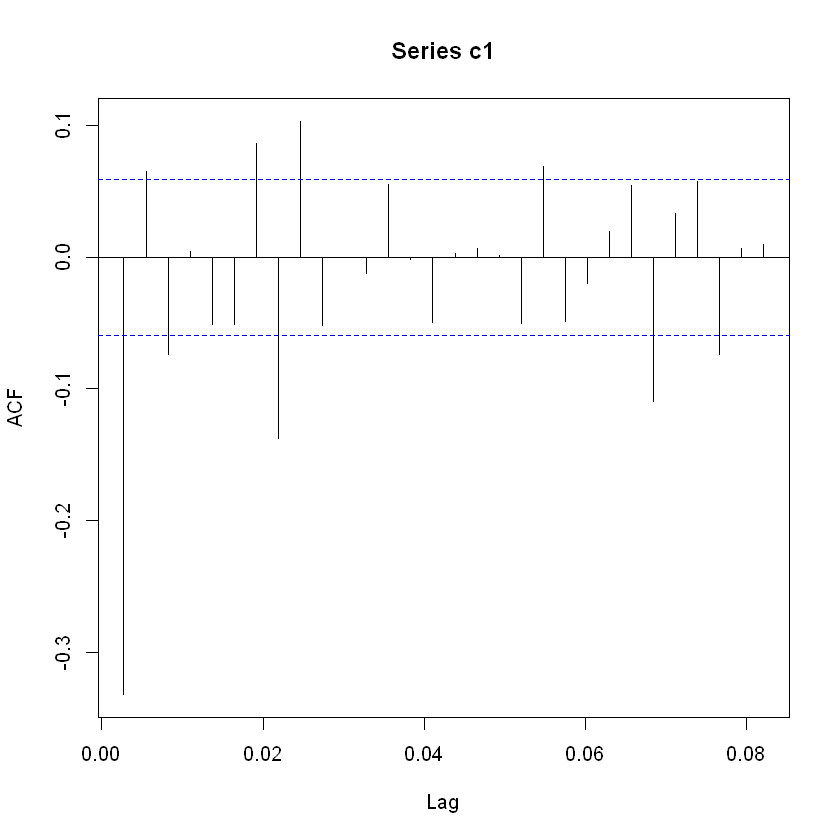

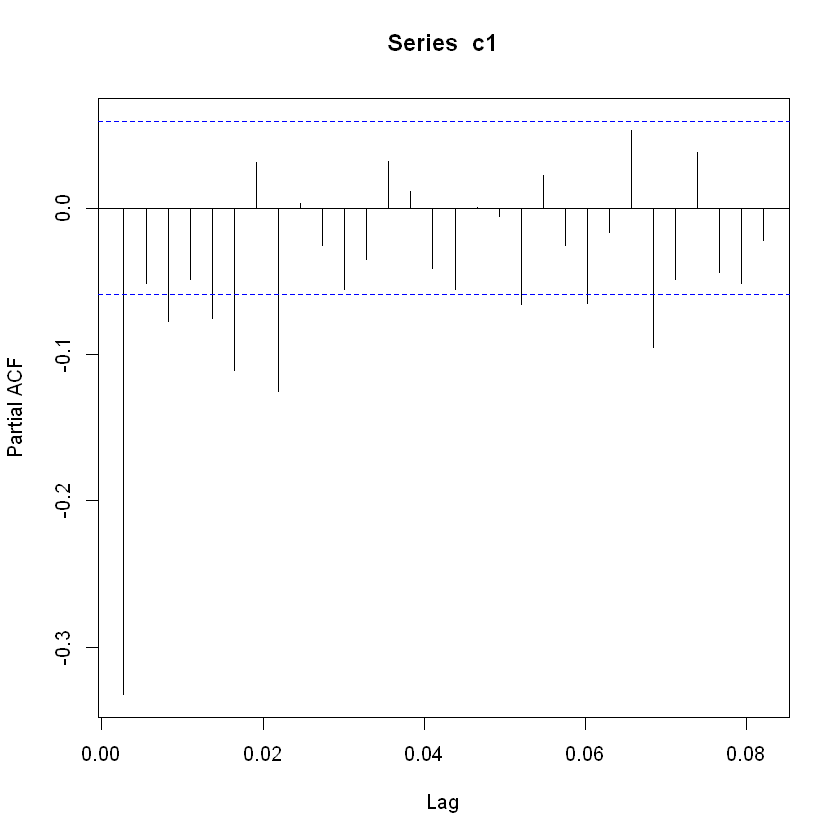

In [41]:
acf(c1) 
pacf(c1) 

**MODELO AR(𝑝)**

In [34]:
ar(c1)


Call:
ar(x = c1)

Coefficients:
      1        2        3        4        5        6        7        8  
-0.3642  -0.1001  -0.1471  -0.1222  -0.1333  -0.1359  -0.0509  -0.1458  
      9       10       11       12       13       14       15       16  
-0.0272  -0.0744  -0.0985  -0.0380   0.0061  -0.0401  -0.0829  -0.0688  
     17       18       19       20       21       22       23       24  
-0.0358  -0.0509  -0.0769  -0.0161  -0.0653  -0.0866  -0.0226   0.0064  
     25       26       27       28       29  
-0.1213  -0.0469   0.0169  -0.0629  -0.0517  

Order selected 29  sigma^2 estimated as  16716

In [35]:
AIC(arima(c1, order=c(29,0,0), method="ML"))

[1] 13787.88

**CONCLUSIÓN:** 

* El orden del mejor AR: 29

* AIC del mejor AR: 13787.8846229924

**MODELO MA(𝑞)**

In [37]:
aic0<-Inf # le das un numero muy grande
for (i in 1:20)
{
  aic1<-AIC(arima(c1, order = c(0,0,i), method ="ML" ))
  if(aic1<aic0)
  {
    aic0<-aic1
    MA.mejor<-i
  }
}
aic0 
MA.mejor

[1] 13786.84

[1] 10

In [ ]:
**CONCLUSIÓN:**

* AIC del mejor MA: -1026.332

* El orden del mejor MA: 10

**MODELO ARMA(p,q)**

In [40]:
arma.aic<-Inf
for(j in 1:10)
{
  for (i in 1:10)
  {
    aux<-AIC(arima(c1, order = c(j,0,i), method ="ML" ))
    if(aux<arma.aic)
    {
      arma.aic<-aux
      ARMA.mejor<-c(j,i)
    }
  }
}
arma.aic
ARMA.mejor 

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"Se han producido NaNs"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible con

[1] 13771.96

[1] 4 9

**CONCLUSIÓN:**

* AIC del mejor ARMA: 13771.9569548743

* El orden del mejor ARMA: 4,9

## Ruido blanco

In [42]:
res<-residuals(arima(c1, order=c(4,0,9)))
print(res)

Time Series:
Start = c(2018, 4) 
End = c(2021, 3) 
Frequency = 365 
   [1]   -3.85202079   -5.39045597    6.84839206  167.60083092 -111.76650841
   [6]  -42.87049869   -4.62171659   -8.01503520    3.71751075   -7.88656082
  [11]  -72.20140421   -9.48101532  -24.28863368   44.52161887  -37.16116735
  [16]  -18.93007254  -32.71604034   -1.75668048   -4.48007042   -8.10650877
  [21]    4.04535646    7.55758022   40.94622581   25.57456154   10.39286921
  [26]    4.64882409  -11.10646465   11.28850354  -44.25359320  -34.06157198
  [31]   -2.07512384   -4.61190850  -13.76139304   -8.88705050  -10.95061041
  [36]   -2.55629998  -13.84076136  -39.12928350  -10.69621571  -18.58164802
  [41]  -15.87615893    1.84944869  -22.95299897  -24.03740070   -3.89406036
  [46]   -3.58449187  -11.73051244   -8.30802901  -14.26453910   -8.67694811
  [51]   -7.30400676   -0.72088612   -9.49668273   -6.22328222   -6.96092259
  [56]   11.67025516   -1.77119037    1.03759725    0.80998300   -5.09541935
  [61]  

**Media**

In [43]:
mean(res)

[1] 0.1054915

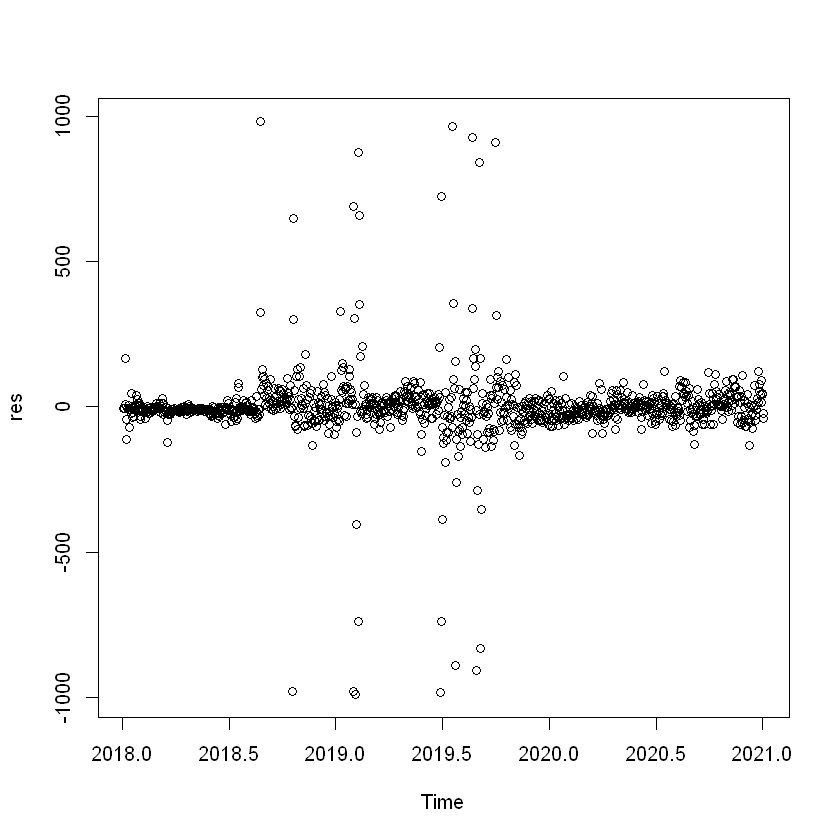

In [44]:
plot(res, type="p")

**Incorrelación**

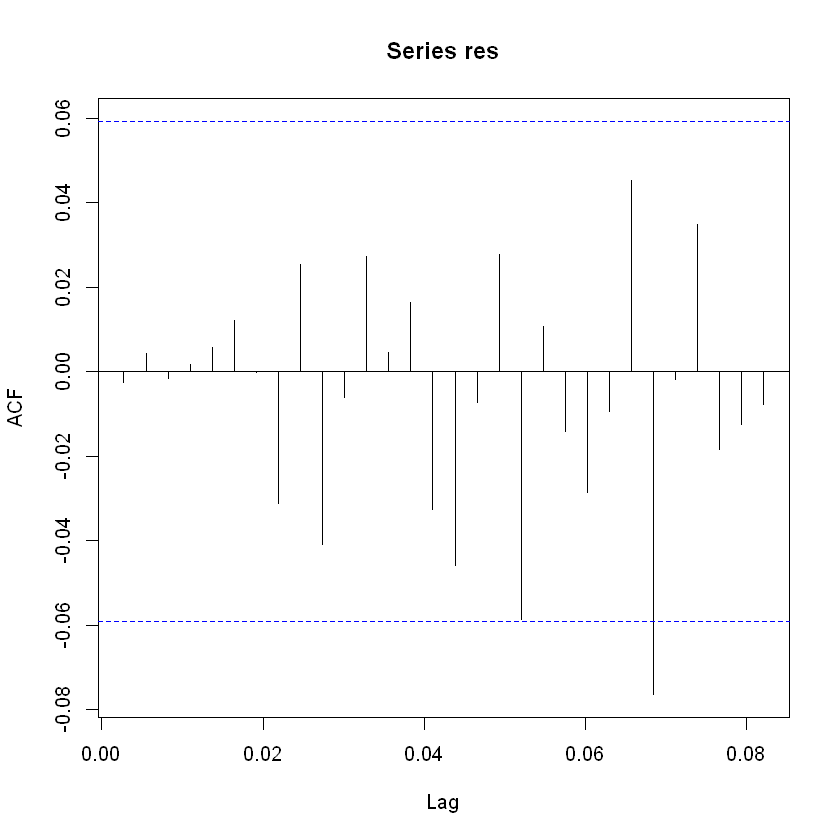

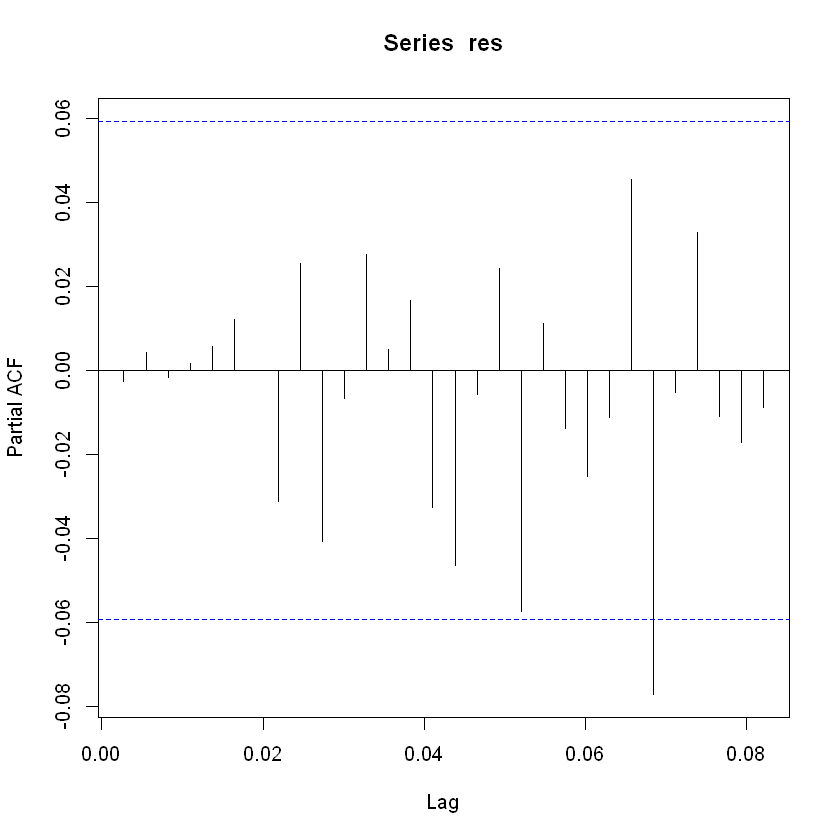

In [45]:
acf(res) 
pacf(res) 

**Incorrelación de forma analítica**

**HO:** Son independientes

**Ha:** Muestran alguna dependencia

alfa=0.05

In [46]:
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 0.0072678, df = 1, p-value = 0.9321


**Normalidad**

**HO:** Sigue una distribución normal

**Ha:** NO sigue una distribución normal

alfa=0.05

In [47]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.49304, p-value < 2.2e-16


## Predicciones

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

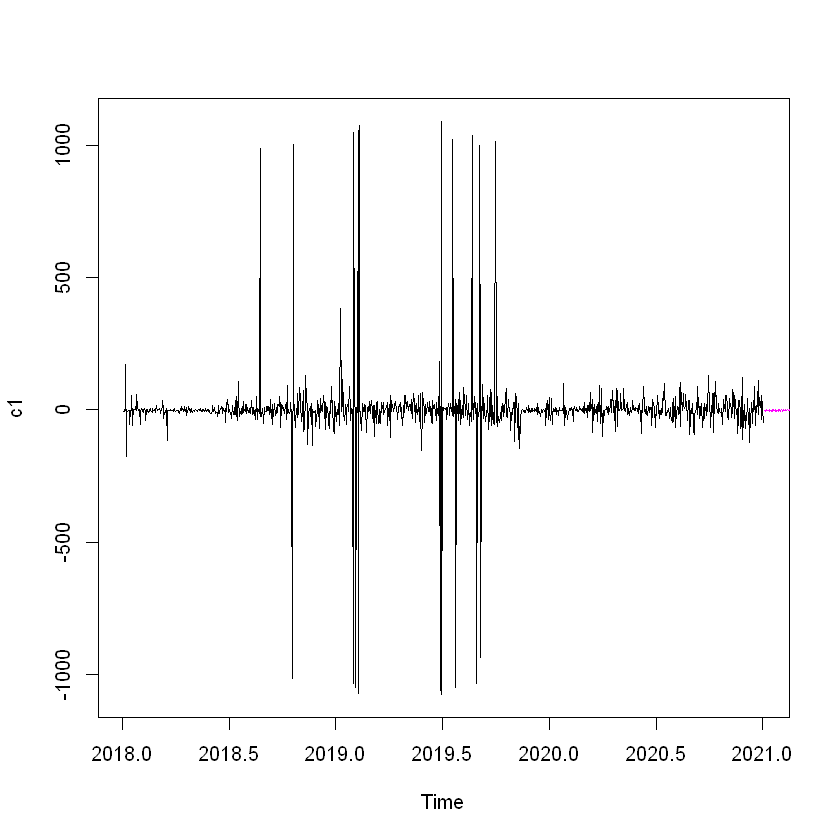

In [50]:
p<-predict(arima(c1, order=c(4, 0,9), method="ML"), n.ahead=100)$pred
plot(c1)
lines(p, col="magenta")